# Chapter 1: Charlie gets an ID

### 1.1 Overview
1. [Chapter 1_ Charlie gets an ID (eID)](https://drive.google.com/file/d/1OKSCENnDkll4ibG0w0ODeHHtAC55gpoy/view?usp=sharing)
1. [Chapter 2_ Charlie wants a loan (eID)](https://drive.google.com/file/d/1neqsRqEt0KcctWajS81tC34J75VpEqP-/view?usp=sharing)
1. [Chapter 3_ Charlie signs up for Petflix (FacePKI)](https://drive.google.com/file/d/1Pz4Esd64-UozycTGhR02Io7LMjbcABq5/view?usp=sharing)
1. [Chapter 4_Charlie_signs into Petflix (FacePKI)](https://drive.google.com/file/d/1LRrSpe-787roFgIQQnvNY1ArRt32Hi68/view?usp=sharing)
1. [Chapter 5_Petflix sends Charlie a catbond meme (FacePKI)](https://drive.google.com/file/d/17QYi8mvRwGKq_JhDYpggO0PWLJn99uv_/view?usp=sharing)
1. [Chapter 6_Charlie decrypts catbond meme (FacePKI)](https://drive.google.com/file/d/1CLy5PYowbgTDiLMyHMhh3SWtqwgF_mWA/view?usp=sharing)


### 1.2 Introduction

In the vibrant city of Cryptoville, Charlie Cryptofson, an ambitious developer, was about to embark on a life-changing journey. He had long heard about the power of SenseCrypt—a groundbreaking technology, designed to securely empower citizens with their digital identities. Today, Charlie would finally claim his. <br><br>

That afternoon, Charlie arrived at the sleek, modern Cryptoville Government Office. When his turn came, he approached the counter with anticipation. Before issuing Charlie his SenseCrypt identity, the government official checked and verified Charlie's passport details (identity, age, data of birth etc), and ran background checks on his credit score as well as criminal records. This is important as the government body is the issuer and needs to verify all details regarding his identity and all the associated metadata that would be stored together with his identity.<br><br>

The government officer, took a quick photo and uploaded it to the government's secure internal system, seamlessly integrated with the SenseCrypt API. This is where the magic of innovation and security came together.<br><br>

**Flow of Events:**
1. Trusted Issuer (Government) takes a photo of user (Charlie).
1. Trused Issuer checks and verifies the details about user (known as metadata).
1. Trusted Issuer creates a SensePrint using the photo of user and his metadata.
1. Trused Issuer gives user a QR code, which contains the SensePrint data in raw bytes. QR code printed on user eID card.
1. QR code can be used for offline verification (Chapter 2)

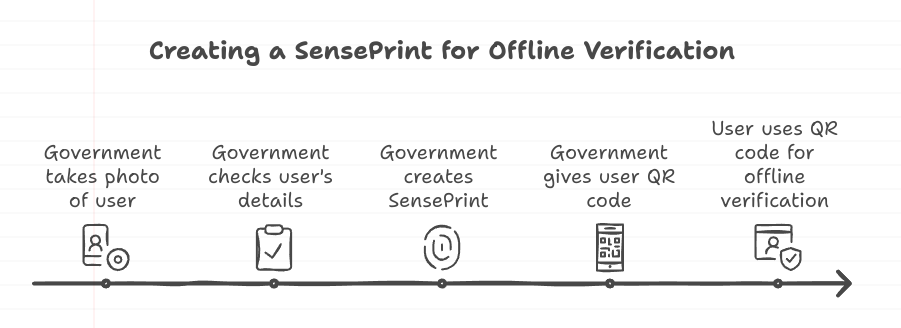

### 1.3 Pre-run cells

In [1]:
# **********************************INPUT************************************#
# Please provide the url of the SenseCrypt server and the associated api key.#
# ***************************************************************************#
url = "https://apiserver.sensecrypt.com/"
api_key = "BjeaACQczWh5Xw5sIEE0mBu1mpCnfOfmM47PT67f7mw="

In [2]:
# Run these helper functions, which will be used later in the notebook
!pip install zxing
import base64
import cv2
import zxing
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# mount your private google drive for saving out artifacts to be used in subsequent notebooks
from google.colab import drive
drive.mount('/content/drive')


def call_sensecrypt_server(api_key, data, endpoint, url):

    full_url = url + endpoint

    # Prepare headers
    headers = {
        "x-api-key": api_key,
        "Content-Type": "application/json"
    }

    # Send POST request
    response = requests.post(full_url, json=data, headers=headers)

    # Check the response status and content
    if response.status_code == 200:
        print("Request was successful")
        return response  # Return JSON data if the request was successful
    else:
        print(f"Request failed with status code: {response.status_code}")
        print(response.text)  # Print the raw response content
        return None

def convert_image_to_base64(image, format="JPEG"):

    # Save the image as a byte stream in memory
    buffered = BytesIO()
    image.save(buffered, format=format)  # Default format is 'JPEG', can be changed
    img_bytes = buffered.getvalue()

    # Convert byte stream to Base64
    img_base64 = base64.b64encode(img_bytes).decode('utf-8')

    return img_base64


def read_qr_code_base64(image_path):


    # Decode QR codes in the image
    reader = zxing.BarCodeReader()
    qr_codes = reader.decode(image_path, possible_formats=['QR_CODE'])

    # If no QR codes are found
    if not qr_codes:
        return "No QR code detected."

    # convert to bytes
    qr_codes = qr_codes.raw.encode('iso-8859-1')

    # convert to base64
    base64_qr_data = base64.b64encode(qr_codes).decode('utf-8')

    return base64_qr_data

def fetch_image(image_url):
  response = requests.get(image_url)
  img = Image.open(BytesIO(response.content))
  return img


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.6/689.6 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for zxing: filename=zxing-1.0.3-py3-none-any.whl size=684457 sha256=d33d80db07e8c2d9ed4e846daca77d7d55ec758a0e7b75b668843cc99af2863a
  Stored in directory: /root/.cache/pip/wheels/54/9e/1d/bcf402d98d94d79cd20e6d6356428c499271755b68da9aa19e
Successfully built zxing
Mounted at /content/drive


### 1.4 Using the `/senseprint-qr` API Endpoint [(Link to documentation)](https://docs.sensecrypt.com/sensecrypt-v3.1.1/sensecrypt-server/sensecrypt-eid/generating-your-first-senseprint-eid-qr)

The government website uses the `/senseprint-qr` API endpoint on the backend. The API creates a biometrically verifiable, yet non-biometric representation of Charlie, which is called his SensePrint. This SensePrint information is then encoded in a QR code which is then returned to the user. Since his SensePrint is privacy preserving and non-linkable, the government need not worry about his identity being compromised. <br><br>

Note that the SensePrint can also encode metadata inside. This metadata is defined by the user when creating the SensePrint. Once the person is verified using his face and his SensePrint, the metadata will be returned to the verifier. For this example, we shall include the following metadata, which may be used in the following chapters.
* Name
* Age
* Date-of-Birth
* Citizenship
* Credit Score
* Criminal Records
* Address

The government officer will then print the QR code on a physical ID card to be given to Charlie. This QR code can then be used to verify Charlie's identity **offline.** We shall see how the verification works in the next chapter!



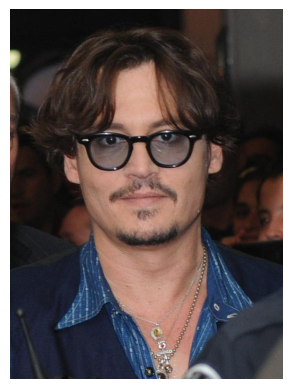

In [3]:
# Preview of the image that the government official took using the webcam
# Here we will load the image from file to simulate the webcam image

# Load the image from link
image = fetch_image("https://github.com/Seventh-Sense-Artificial-Intelligence/SenseCrypt-Walkthrough/blob/main/images/JohnnyDepp_1.jpg")
plt.imshow(image)
plt.axis("off")
plt.show()

img_base64: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCALpAiUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDwzBpcUZpDQAH0oPSg0tACHrR+NBoFACYpcUYoPAoAKKKO1ABSDrRRQAYowaXIooAKM4opKAClpKO1AAevSj8KKWgAooooAKKKKACiikoAWk9aX15pOgoAM0fWjFLQAh60UUUAFFJiigBaQ0ZpM80AHNOFNz7U

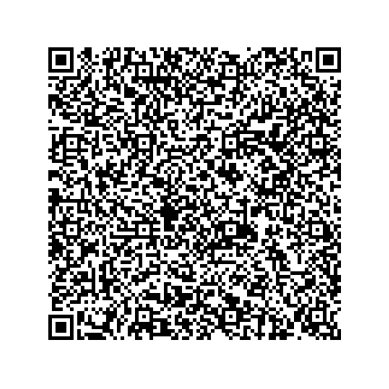

Successfully saved qr code to google drive


In [4]:
# Prepare the image to be passed into the /senseprint-raw endpoint
img_base64 = convert_image_to_base64(image)
print("img_base64:", img_base64)

data = {
    "face_base_64": img_base64,
    "record_id": "A0123453", # arbitrary. set this according to your requirements. For example, you can use the national ID.
    "require_live_face": False,
    "metadata": {
    "name": "Charlie Cryptofson",
    "age": "38", # simulated metadata
    "date_of_birth": "17-09-1983", # simulated metadata
    "citizenship": "Cryptonian", # simulated metadata
    "criminal_record": "None", # simulated metadata
    "credit_score": "700", # simulated metadata
    "address": "123 Crypt Street, Cryptoville", # simulated metadata
  },
}

endpoint = "/senseprint-qr"

response_data = call_sensecrypt_server(api_key, data, endpoint, url)

# Convert the binary data into an image using BytesIO
img = Image.open(BytesIO(response_data.content))

# Display the image using matplotlib
plt.imshow(img)
plt.axis("off")
plt.show()

# save out the qr code to your mounted google drive
img.save('/content/drive/My Drive/qr_code.jpg')

print("Successfully saved qr code to google drive")

Now that the QR code has been generated, the government official can print this QR code on to a card (eID card for example). Charlie can then use this QR code to verify his identity. Let's see how this is done in the next chapter!<br><br>

This SensePrint can also be stored in the Government servers for later use. See Chapter 3 for more information.

>**A note on SensePrint:** Since the SensePrint is itself not linkable back to the any individual persons, it can be shared freely. In this case, both the Government and Petflix can store the generated SensePrint.

### 1.5 Inspect the QR code

Let's also inspect the QR code to see what is stored inside!


>**Note:** Do note that the QR codes stores the raw bytes data of the SensePrint. Most QR code readers perform their own form of decoding. Please ensure to use the correct raw bytes data to encode as base64 before passing to the endpoint. If you face the error `ERR_PARSE_FAILED when the senseprint_base_64 could not be interpreted as a valid SensePrint`, it could likely be due to this reason. Please check if your QR code reader already decodes the data as `iso-8859-1` or `utf-8`, and encode them back using the same standard to get the raw bytes data, before further encoding them as base64 to pass to the end point.

In [5]:
# decode qr code
senseprint_qr_data = read_qr_code_base64(img)
print("senseprint_qr_data:", senseprint_qr_data)

# save out the qr code to your mounted google drive
with open('/content/drive/My Drive/senseprint_qr_data.txt', 'w') as f:
    f.write(senseprint_qr_data)
print("Successfully saved senseprint_qr_data to google drive")

senseprint_qr_data: AoMpvg2+QAflp6L0y3V5BDiiKc9dalHQNSMxP9xxR78SCYJV81uT94WnOz0i8N20oA46rlsvOFs8tNQSgr8H61y4Pe1lECCfM1T8cxVqDvfftFttWiUzUZcMoZaYO9g+CA7OONXQE1aMrMRvWhtHJ73vGhWNn+bs54aZnDnWGokNtqysYxwlHilZmgAi1s5rMbdxejaHbl08DIH/T1XKymDXFHRXuVEZe3NnnlvOU6Kh8NrH+HMEe/0s9QhJT3brFboAAzL4Kt78Dwuouqqa97b66disGsdkyxa4Nj3o3jL5tjDEC3u3OAGIBbWlz7p9oev+5G74WK0OOrogHdi/z1Rg6JR6OK0Mxrn3OWsT20gIo8CxacW3/1h7xTiNfgVVfqjkQFynNOIL4yfGOQJ7L17iGLNxL2A69QWgDDdZR0QYbzyCPGSZouFx9m39YyJj180lmr2NJMF//56IVYRG3xEHYP7UW3bgzUfRe3Ua7S+BGV1iK+A/3DQ/hbKCrRb9127yDmyVDv05z8lj6pcLIMcYrwbxIN+lORlEA5e5zDtHq/ztnS6EhRoVN3WG23hNuBiydWL/rXkws2K+8iGNIO+ib6mHIoEOWnyKEwCmCrseJclHR5DfOZ6M0k8ZM2/tcMc5eK0ifDb3BwqI7BnD0OM+y8FjSx6l2BYdZ5OkkNUpDnkZEor3nkN1EETFgPERyRfptJsW+9COPHGEwg+CuLP0sY/215H6KJjABybhMfhmwZC80WpY4amSidd7VBDNEVXiCsdx
Successfully saved senseprint_qr_data to google drive


The QR code stores the raw bytes of the SensePrint. After encoding to base64 format, you can see how the SensePrint information looks like.
Note that this SensePrint has the following properties:
* **Unlinkable:** Given two SensePrint of the same person, it is impossible to determine if they belong to the same individual or not.
* **Irreversible:** A SensePrint cannot be reversed to derive the original biometric or facial information, as it contains no biometric data.
* **Revocable and Renewable:** Multiple SensePrint can be generated from the same person. While you can't change your face, you can change your SensePrint as needed.

Continue on to Chapter 2: Charlie wants a loan (eID) [here](https://drive.google.com/file/d/1neqsRqEt0KcctWajS81tC34J75VpEqP-/view?usp=sharing)!